In [1]:
import numpy as np
import pandas as pd

from fractions import Fraction
from collections import defaultdict, Counter
from iteration_utilities import deepflatten #flatten nested lists


from music21 import midi, note, stream, instrument, meter, key
import itertools
import random


import nltk #for NLP
import string
import mchmm #for Markov models

#Just a helper function
def flatten_list(hierarchical_list):
    #Flatten a list of lists
    return [x for sublist in hierarchical_list for x in sublist]

In [8]:
UNIT = 1 #We express duration as fractions of a whole note. Use UNIT = 1/4 to express durations as fractions of quarter-notes

def percussion_hit(duration, pitch = "C4"):
    #Create Note object for percussion hits (default pitch is C4)
    return note.Note(pitch, quarterLength = duration*(4*UNIT))

In [33]:
def create_percussion(time_sig = None):
    #Initialize a percussion stream with Woodblock timbre
    #If time signature is None, no measure splits
    if time_sig == None:
        drumPart = stream.Measure()
    else:
        drumPart = stream.Stream()
        drumPart.timeSignature = meter.TimeSignature(time_sig)
    
    drumPart.insert(0, instrument.Woodblock()) #assign here the instrument
    return drumPart

In [6]:
def append_event(duration, original_stream, rest = False, pitch = 'C4'):
    #Returns a new_stream obtained by appending a rhythmical event or a rest of given duration to the original_stream
    new_stream = original_stream
    if rest:
        new_stream.append(note.Rest(quarterLength = duration*(4*UNIT)))
    else:
        new_stream.append(percussion_hit(duration, pitch))
    return new_stream

In [2]:
def rhythm_from_sequence(durations, time_sig = None, pitch = 'C4', rhythm=None):
    #Generate rhythmic stream from a list of durations. Rests are indicated by specifying a duration as a string
    if rhythm is None:
        # pass an existing stream 'rhythm' to append the durations, otherwise a new one will be created
        rhythm = create_percussion(time_sig = time_sig)
    for dur in durations:
        is_rest = False
        if dur != 0:
            if isinstance(dur, str):
                #if duration is given as a string, interpret and rest and turn string into a numerical value
                is_rest = True
                dur = Fraction(dur)
            
            rhythm = append_event(dur, rhythm, rest = is_rest, pitch = pitch) 
    return rhythm

In [29]:
seq1 = [1/2,1/2,1/4,1/4,'1/8',1/8,1/4]
seq2 = [1/4,'1/4',3/8,1/8,1/2,3/8,1/8]
seq3 = [1/2,'1/4',1/4,1/4,'1/2',1/8,1/8]
seq4 = [1/4,'1/4',1/4,1/2,'1/2',1/4]
seq5 = [1,1/4,1/2,1/4]
seq6 = [1/4,1/8,1/8,1/4,1/4,1/2,1/8,1/8,1/4]
seq7 = [1/2,1/4,1/4,3/4,'1/8',1/8]
seq8 = [1/4,'1/4',1/4,1/4,1/2,'1/4',1/4]
seq9 = ['1/2',1/2,1/4,'1/2',1/4]

In [35]:
rhythm = []
rhythm.append(rhythm_from_sequence(seq1, time_sig = '4/4', pitch = 'A4'))
rhythm.append(rhythm_from_sequence(seq2, time_sig = '4/4', pitch = 'A4'))
rhythm.append(rhythm_from_sequence(seq3, time_sig = '4/4', pitch = 'A4'))
rhythm.append(rhythm_from_sequence(seq4, time_sig = '4/4', pitch = 'A4'))
rhythm.append(rhythm_from_sequence(seq5, time_sig = '4/4', pitch = 'A4'))
rhythm.append(rhythm_from_sequence(seq6, time_sig = '4/4', pitch = 'A4'))
rhythm.append(rhythm_from_sequence(seq7, time_sig = '4/4', pitch = 'A4'))
rhythm.append(rhythm_from_sequence(seq8, time_sig = '4/4', pitch = 'A4'))
rhythm.append(rhythm_from_sequence(seq9, time_sig = '4/4', pitch = 'A4'))

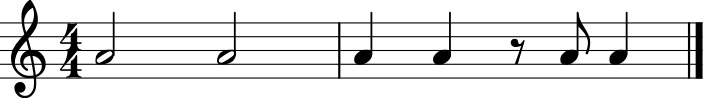

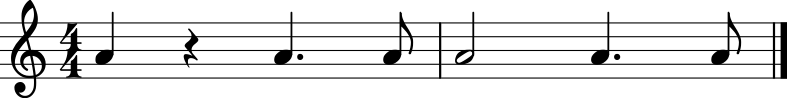

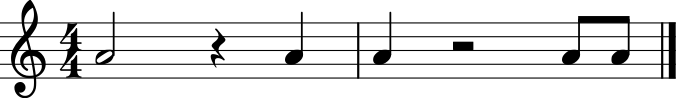

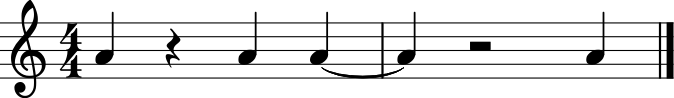

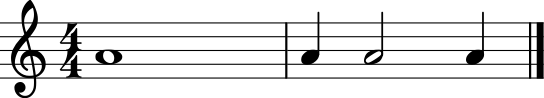

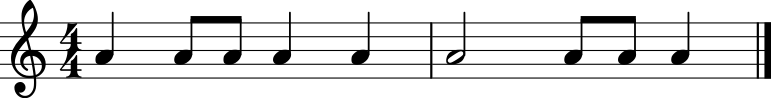

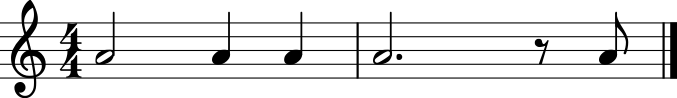

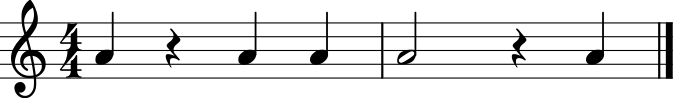

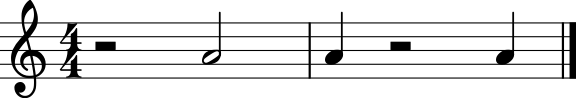

In [21]:
for x in range(len(rhythm)):
    rhythm[x].show()

In [15]:
midi.realtime.StreamPlayer(rhythm[0]).play()

pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
